In [1]:
# Cell 1: Setup and Imports
# ==============================================================================
# This cell sets up the Python path to find your envnet library and imports
# all the necessary modules for the analysis.

import pandas as pd
import os
import sys
import matplotlib.pyplot as plt

# --- Configure Python Path ---
# Add the root of your envnet repository to the Python path.
# Adjust this path if your notebook is in a different location.
PYTHONPATH = "/global/homes/b/bpb/repos/envnet"
if PYTHONPATH not in sys.path:
    sys.path.insert(0, PYTHONPATH)

# --- Import ENVnet Modules ---
from envnet.config.analysis_config import AnalysisConfig
from envnet.analysis.core import AnalysisEngine  # CORRECTED: Use AnalysisEngine

print("Setup complete. ENVnet modules imported successfully.")

Setup complete. ENVnet modules imported successfully.


In [4]:
# Cell 2: Configuration
# ==============================================================================
# Create an analysis configuration object and specify the paths to your
# input files.

# --- !! IMPORTANT: SET YOUR FILE PATHS HERE !! ---
# Define the main directory where your build results are located.
# results_dir = "/global/u2/b/bpb/repos/envnet/results/full_build_20250908_181404"
results_dir = '/pscratch/sd/b/bpb/envnet_annotation_results/'
# Path to the metadata file that maps filenames to environmental classes.
# This file was likely generated during the build process.
metadata_file = os.path.join("/global/u2/b/bpb/repos/envnet/results/full_build_20250908_181404", "input_for_annotation.csv")

# --- Create and Populate the AnalysisConfig ---
config = AnalysisConfig()

# Set the paths for the annotation results files from your config.
config.ms1_results_file = os.path.join(results_dir, "ms1_results_build_files_for_paper", "ms1_annotations.parquet")
config.ms2_deconv_results_file = os.path.join(results_dir, "ms2_results_build_files_for_paper", "ms2_deconvoluted_annotations.parquet")

print("Configuration define:")
print(f"  MS1 Results: {config.ms1_results_file}")
print(f"  MS2 Results: {config.ms2_deconv_results_file}")
print(f"  Metadata File: {metadata_file}")

Configuration define:
  MS1 Results: /pscratch/sd/b/bpb/envnet_annotation_results/ms1_results_build_files_for_paper/ms1_annotations.parquet
  MS2 Results: /pscratch/sd/b/bpb/envnet_annotation_results/ms2_results_build_files_for_paper/ms2_deconvoluted_annotations.parquet
  Metadata File: /global/u2/b/bpb/repos/envnet/results/full_build_20250908_181404/input_for_annotation.csv


In [5]:
# # # engine.file_metadata.loc[0]
# import pandas as pd
# filename = '/global/homes/b/bpb/repos/envnet/results/full_build_20250908_181404/ms2_results/ms2_deconvoluted_annotations.parquet'
# # ms1_filename = '/global/homes/b/bpb/repos/envnet/results/full_build_20250908_181404/ms1_results/ms1_annotations.parquet'
# df = pd.read_parquet(filename)
# # ms1_df = pd.read_parquet(ms1_filename)
# # print(ms1_df.shape)
# # ms1_df = ms1_df[ms1_df['original_index'].isin(df['original_index'].unique())]
# # print(ms1_df.shape)
# df.head()

In [6]:
# print(df.columns)

In [7]:
# Cell 3: Load and Prepare Data
# ==============================================================================
# Use the AnalysisEngine to load and prepare the data.

# Initialize the engine with our configuration.
engine = AnalysisEngine(config)

try:
    # Step 1: Load the raw data using the engine's loading method
    engine.load_annotation_results(file_metadata=metadata_file)
    
    # Step 2: Prepare the data for analysis using the engine's preparation method
    analysis_df = engine.prepare_analysis_data(require_ms2_support=True)
    
    print("\nData loaded and prepared successfully.")
    print(f"Total records in final DataFrame: {len(analysis_df)}")
    print(f"Unique features/compounds: {analysis_df['original_index'].nunique()}")
    print("Columns:", analysis_df.columns.tolist())
    
    analysis_df.head()

except (FileNotFoundError, ValueError) as e:
    print(f"\nError: {e}")
    print("Please ensure the file paths in Cell 2 are correct and data was loaded.")

Loading annotation results...
Loaded MS1 data: 26964953 records
Loaded MS2 deconvoluted data: 8627664 records
Loaded MS1 data: 26964953 records
Loaded MS2 deconv data: 8627664 records
Loaded MS2 original data: 0 records
Preparing analysis data...


/global/homes/b/bpb/repos/envnet/envnet/analysis/dataloading.py:188: FutureWarning: The default value of regex will change from True to False in a future version.
  data['lcmsrun_observed'] = data['lcmsrun_observed'].str.replace('.h5', '')
/global/homes/b/bpb/repos/envnet/envnet/analysis/dataloading.py:189: FutureWarning: The default value of regex will change from True to False in a future version.
  data['lcmsrun_observed'] = data['lcmsrun_observed'].str.replace('.mzML', '')
/global/homes/b/bpb/repos/envnet/envnet/analysis/dataloading.py:225: FutureWarning: The default value of regex will change from True to False in a future version.
  all_matches['filename'] = all_matches['filename'].str.replace('.h5', '')
/global/homes/b/bpb/repos/envnet/envnet/analysis/dataloading.py:226: FutureWarning: The default value of regex will change from True to False in a future version.
  all_matches['filename'] = all_matches['filename'].str.replace('.mzml', '')


MS2 filtering: 26964953 -> 1066393 features
analysis columns: ['original_index', 'num_datapoints', 'rt_peak', 'peak_height', 'peak_area', 'lcmsrun_observed', 'filename']
file metadata columns: ['parquet', 'h5', 'environmental_subclass', 'lcmsrun_observed', 'original_file_type']
Analysis filename:  /global/cfs/cdirs/metatlas/projects/envnet_build_files/metatlas/20230223_EB_MdR_101544-059_SynDAC_20230223_QE144_C18-EP_USDAY72350_NEG_MS2_29_RS-HA-NA_1__18
File metadata filename:  /global/cfs/cdirs/metatlas/projects/envnet_build_files/metatlas/20230223_EB_MdR_101544-059_SynDAC_20230223_QE144_C18-EP_USDAY72350_NEG_MS2_29_RS-HA-NA_1__18


/global/homes/b/bpb/repos/envnet/envnet/analysis/dataloading.py:169: FutureWarning: The default value of regex will change from True to False in a future version.
  file_metadata['filename'] = file_metadata['h5'].str.replace('.h5', '')


Prepared data: 1066393 records

Data loaded and prepared successfully.
Total records in final DataFrame: 1066393
Unique features/compounds: 20332
Columns: ['original_index', 'num_datapoints', 'rt_peak', 'peak_height', 'peak_area', 'lcmsrun_observed', 'filename_x', 'parquet', 'h5', 'environmental_subclass', 'original_file_type', 'filename_y']


In [8]:
envo_df = pd.read_csv('/global/homes/b/bpb/repos/envnet/envnet/data/envo_relationships.csv')
cols = ['id', 'common parent name']
engine.merged_data = pd.merge(engine.merged_data, envo_df[cols], left_on='environmental_subclass', right_on='id', how='left')
engine.merged_data.head()

,original_index,num_datapoints,rt_peak,peak_height,peak_area,lcmsrun_observed,filename_x,parquet,h5,environmental_subclass,original_file_type,filename_y,id,common parent name
0,27212,664,0.661214,2.388780e+05,1.688576e+07,/global/cfs/cdirs/metatlas/projects/envnet_bui...,/global/cfs/cdirs/metatlas/projects/envnet_bui...,/global/cfs/cdirs/metatlas/projects/envnet_bui...,/global/cfs/cdirs/metatlas/projects/envnet_bui...,Suwannee River Humic Acid Standard III,h5,/global/cfs/cdirs/metatlas/projects/envnet_bui...,Suwannee River Humic Acid Standard III,IHSS Reference Standards
1,40408,11,11.175333,7.207986e+03,2.766782e+04,/global/cfs/cdirs/metatlas/projects/envnet_bui...,/global/cfs/cdirs/metatlas/projects/envnet_bui...,/global/cfs/cdirs/metatlas/projects/envnet_bui...,/global/cfs/cdirs/metatlas/projects/envnet_bui...,Suwannee River Humic Acid Standard III,h5,/global/cfs/cdirs/metatlas/projects/envnet_bui...,Suwannee River Humic Acid Standard III,IHSS Reference Standards
2,41019,506,1.645083,1.207952e+06,4.741983e+07,/global/cfs/cdirs/metatlas/projects/envnet_bui...,/global/cfs/cdirs/metatlas/projects/envnet_bui...,/global/cfs/cdirs/metatlas/projects/envnet_bui...,/global/cfs/cdirs/metatlas/projects/envnet_bui...,Suwannee River Humic Acid Standard III,h5,/global/cfs/cdirs/metatlas/projects/envnet_bui...,Suwannee River Humic Acid Standard III,IHSS Reference Standards
3,41232,506,1.645083,1.207952e+06,4.741983e+07,/global/cfs/cdirs/metatlas/projects/envnet_bui...,/global/cfs/cdirs/metatlas/projects/envnet_bui...,/global/cfs/cdirs/metatlas/projects/envnet_bui...,/global/cfs/cdirs/metatlas/projects/envnet_bui...,Suwannee River Humic Acid Standard III,h5,/global/cfs/cdirs/metatlas/projects/envnet_bui...,Suwannee River Humic Acid Standard III,IHSS Reference Standards
4,47875,234,2.484806,1.653001e+06,1.167420e+07,/global/cfs/cdirs/metatlas/projects/envnet_bui...,/global/cfs/cdirs/metatlas/projects/envnet_bui...,/global/cfs/cdirs/metatlas/projects/envnet_bui...,/global/cfs/cdirs/metatlas/projects/envnet_bui...,Suwannee River Humic Acid Standard III,h5,/global/cfs/cdirs/metatlas/projects/envnet_bui...,Suwannee River Humic Acid Standard III,IHSS Reference Standards


In [9]:
build_files = pd.read_csv('/global/homes/b/bpb/repos/envnet/scripts/build_files.csv')
cols = ['id', 'common parent name']
build_files = pd.merge(build_files, envo_df[cols], left_on='environmental_subclass', right_on='id', how='left')
build_files.groupby('common parent name').size().reset_index(name='counts').sort_values('counts', ascending=False)

,common parent name,counts
2,sea water,698
3,soil,443
1,fresh water,221
0,IHSS Reference Standards,27


In [10]:
from multiprocessing import Pool
import pandas as pd

def count_ms2_spectra(filename):
    """Count unique retention times in MS2 data from HDF5 file."""
    try:
        df = pd.read_hdf(filename, key='ms2_neg')
        return df['rt'].nunique()
    except Exception as e:
        print(f"Error processing {filename}: {e}")
        return 0

# Use multiprocessing to accelerate counting
with Pool(20) as pool:
    build_files['num_ms2'] = pool.map(count_ms2_spectra, build_files['h5'])

print(f"Processed {len(build_files)} files")
print(f"Total MS2 spectra: {build_files['num_ms2'].sum()}")


Processed 1389 files
Total MS2 spectra: 5551788


In [11]:
build_files.groupby('common parent name')['num_ms2'].sum().reset_index(name='total_ms2').sort_values('total_ms2', ascending=False)

,common parent name,total_ms2
2,sea water,3116783
3,soil,1538424
1,fresh water,802481
0,IHSS Reference Standards,94100


In [12]:
def get_numdeconvoluted(filename):
    """Count unique retention times in MS2 data from HDF5 file."""
    try:
        df = pd.read_parquet(filename)
        return df.shape[0]
    except Exception as e:
        print(f"Error processing {filename}: {e}")
        return 0

# Use multiprocessing to accelerate counting
with Pool(20) as pool:
    build_files['num_deconvoluted'] = pool.map(get_numdeconvoluted, build_files['parquet'])

print(f"Processed {len(build_files)} files")
print(f"Total deconvoluted spectra: {build_files['num_deconvoluted'].sum()}")

Processed 1389 files
Total deconvoluted spectra: 4721219


In [13]:
build_files.groupby('common parent name')['num_deconvoluted'].sum().reset_index(name='total_deconvoluted').sort_values('total_deconvoluted', ascending=False)

,common parent name,total_deconvoluted
2,sea water,3307671
3,soil,685504
1,fresh water,684577
0,IHSS Reference Standards,43467


Saved UpSet plot to: /global/homes/b/bpb/repos/envnet/results/full_build_20250908_181404/upset_plot_environmental_classes.pdf


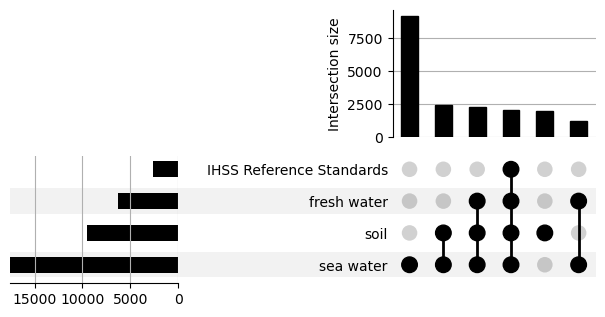

In [21]:
def prepare_upset_data(compound_dict):
    """Prepare data for UpSet plot."""
    # Convert dictionary to list of tuples
    data_tuples = [
        (env, compound) 
        for env, compounds in compound_dict.items() 
        for compound in compounds
    ]
    
    # Create DataFrame
    df = pd.DataFrame(data_tuples, columns=['Environment', 'Compound'])
    
    # Pivot to binary matrix
    binary_df = df.groupby('Compound')['Environment'].apply(
        lambda x: pd.Series(1, x)
    ).unstack().fillna(0).astype(bool)
    
    # Group by columns and count
    columns = binary_df.columns.tolist()
    grouped_counts = binary_df.groupby(columns).size()
    
    return grouped_counts

envo_df = pd.read_csv('/global/homes/b/bpb/repos/envnet/envnet/data/envo_relationships.csv')
cols = ['id', 'common parent name']
temp = pd.merge(analysis_df, envo_df[cols], left_on='environmental_subclass', right_on='id', how='left')
temp.head()

grouped_compounds = temp.groupby('common parent name')['original_index'].unique()
compound_dict = grouped_compounds.to_dict()

# Convert to UpSet format
upset_data = prepare_upset_data(compound_dict)

# Create UpSet plot with larger totals plot
from upsetplot import plot

# Set rcParams for PDF export with embedded fonts
plt.rcParams['pdf.fonttype'] = 42  # TrueType fonts
plt.rcParams['ps.fonttype'] = 42   # TrueType fonts for PostScript
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans', 'Helvetica']

# rotate the counts in the intersection plot for better readability
fig = plt.figure(figsize=(25, 7))
ax_dict = plot(
    upset_data, 
    fig=fig,
    sort_by='cardinality',
    # show_counts=True,
    min_subset_size=1000,
    totals_plot_elements=5,  # Make totals plot bigger (default is 2)
    intersection_plot_elements=4
)


# # Set y-axis limits for the totals (bottom left) plot
# set_size_ax = ax_dict['totals']
# set_size_ax.set_ylim(0, 20000)
# plt.tight_layout()

# Export as PDF with embedded fonts
output_pdf = '/global/homes/b/bpb/repos/envnet/results/full_build_20250908_181404/upset_plot_environmental_classes.pdf'
fig.savefig(output_pdf, format='pdf', bbox_inches='tight', dpi=300)
print(f'Saved UpSet plot to: {output_pdf}')

In [22]:
PYTHONPATH = "/global/homes/b/bpb/repos/envnet"
if PYTHONPATH not in sys.path:
    sys.path.insert(0, PYTHONPATH)
import os
from envnet.annotation.core import AnnotationEngine
annotation_engine = AnnotationEngine()
ref_dir = '/global/homes/b/bpb/repos/envnet/results/full_build_20250908_181404/'
node_data = annotation_engine.load_envnet_reference(
    graphml_file=os.path.join(ref_dir, "network_with_sirius.graphml"),
    mgf_base_name=os.path.join(ref_dir, "envnet")
)   
# cols = [  'precursor_mz', 'isolated_precursor_mz','coisolated_precursor_count',
    #    'filename', 'rt', 'num_datapoints', 'peak_area', 'peak_height', 'mz_centroid', 'rt_peak']
df = node_data['nodes'].copy()

Loading ENVnet reference data...
  GraphML file: /global/homes/b/bpb/repos/envnet/results/full_build_20250908_181404/network_with_sirius.graphml
  Deconvoluted MGF: /global/u2/b/bpb/repos/envnet/data//global/homes/b/bpb/repos/envnet/results/full_build_20250908_181404/envnet_deconvoluted_spectra.mgf
  Original MGF: /global/u2/b/bpb/repos/envnet/data//global/homes/b/bpb/repos/envnet/results/full_build_20250908_181404/envnet_original_spectra.mgf
Loaded 22128 ENVnet nodes


In [23]:
import requests
import pandas as pd
url = "https://npclassifier.gnps2.org/classify"
df.reset_index(inplace=True,drop=True)
out = []
for i,row in df[pd.notna(df['inchi_key'])].iterrows(): # for some reason smiles is "" and not None
    # smiles = df.loc[0,'smiles_identity']
    r = requests.get(url, params={"smiles": row['smiles']})
    if r.status_code == 200:
        d = r.json()
    else:
        if 'C' in row['smiles']:
            print(row['smiles'])
        d = {'class_results': None,
                     'superclass_results': None,
                     'pathway_results': None,
                     'isglycoside': False}
    d['inchi_key'] = row['inchi_key']
    out.append(d)
out2 = pd.DataFrame(out)
cols = ['class_results', 'superclass_results', 'pathway_results']
for c in cols:
    out2[c] = out2[c].apply(lambda x: '|'.join(sorted(x)) if isinstance(x,list) else '')
out2.to_csv('../envnet/data/library_matches_npclassifier_results.csv', index=False)

In [24]:
df = pd.merge(df, out2.add_suffix('_library_match'), left_on='inchi_key', right_on='inchi_key_library_match', how='left')
df.drop(columns=['inchi_key_library_match'], inplace=True)

In [25]:
class_counts_library_match.index.tolist()[0]

NameError: name 'class_counts_library_match' is not defined

In [ ]:
# in class_counts_library_match shorten
# Lanostane, Tirucallane and Euphane triterpenoids to
# Lanostane and other triterpenoids
def shorten_class_name(class_name):
    # the index will be the class name
    if 'Lanostane, Tirucallane and Euphane triterpenoids' in class_name:
        return class_name.replace('Lanostane, Tirucallane and Euphane triterpenoids', 'Lanostane and other triterpenoids')
    return class_name

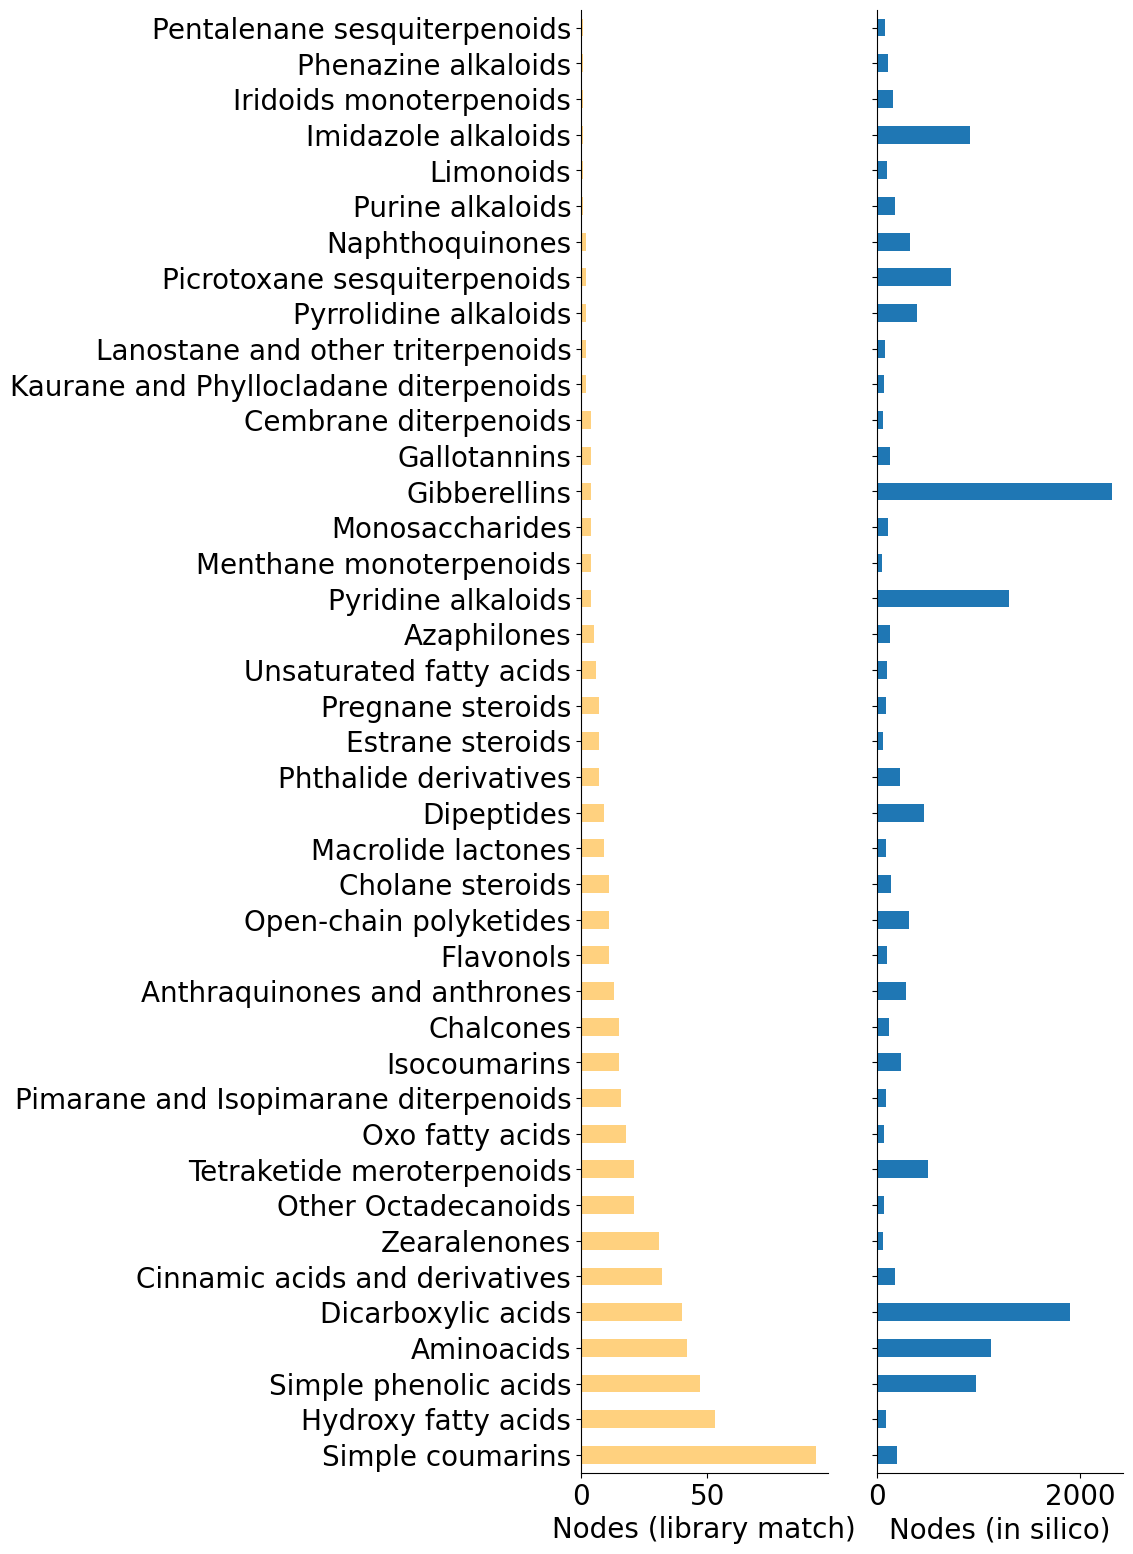

In [31]:
idx1 = pd.notna(df['NPC#class'])
idx2 = df['NPC#class'] != ''
idx = idx1 & idx2
class_counts = df.loc[idx,'NPC#class'].value_counts().head(60)
class_counts.index = class_counts.index.map(shorten_class_name)
idx1 = pd.notna(df['class_results_library_match'])
idx2 = df['class_results_library_match'] != ''
idx = idx1 & idx2
class_counts_library_match = df.loc[idx,'class_results_library_match'].value_counts()
class_counts_library_match.index = class_counts_library_match.index.map(shorten_class_name)
import matplotlib.pyplot as plt
my_indes = class_counts_library_match.index.intersection(class_counts.index)
# sort both by my_index
class_counts_library_match = class_counts_library_match.reindex(my_indes)

class_counts = class_counts.reindex(my_indes)
# plot side by side bar plot
fig,ax = plt.subplots(nrows=1,ncols=2, figsize=(7,19), sharey=True)
# bar plot orient horizontal share y axis to common class names
class_counts_library_match.plot(kind='barh', ax=ax[0], color='orange', alpha=0.5)
class_counts.plot(kind='barh', ax=ax[1])

ax[1].set_xlabel('Nodes (in silico)',fontsize=20)
ax[0].set_xlabel('Nodes (library match)',fontsize=20)

#  increase font size of tick labels
ax[0].tick_params(axis='both', labelsize=20)
ax[1].tick_params(axis='both', labelsize=20)

# remove top and right spines
for a in ax:
    a.spines['top'].set_visible(False)
    a.spines['right'].set_visible(False)

plt.show()


In [17]:
engine.config.min_upset_subset_size = 1000

Generating UpSet plot...


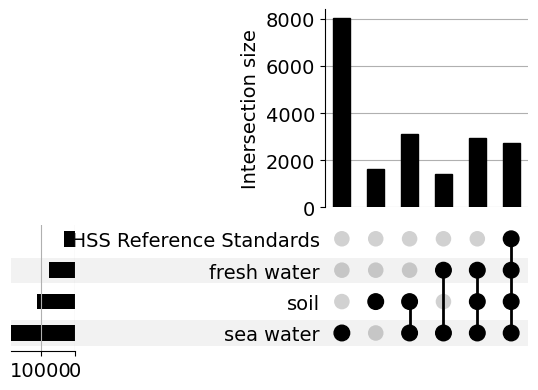

In [18]:

fig = engine.generate_upset_plot(
    grouping_column='common parent name', fig_width=20, fig_height=10, 
)

plt.show() # Display the plot generated by the engine


In [29]:
# get node data for most frequently occiring original indices
top_indices = analysis_df['original_index'].value_counts().head(10).index.tolist()

# in annotation module use the annotation engine to get node data with the function load_envnet_reference
# import nnotation module's engine
from envnet.annotation.core import AnnotationEngine
annotation_engine = AnnotationEngine()
node_data = annotation_engine.load_envnet_reference(
    graphml_file=os.path.join(results_dir, "network_with_sirius.graphml"),
    mgf_base_name=os.path.join(results_dir, "envnet")
)   


Loading ENVnet reference data...
  GraphML file: /global/u2/b/bpb/repos/envnet/results/full_build_20250908_181404/network_with_sirius.graphml
  Deconvoluted MGF: /global/u2/b/bpb/repos/envnet/data//global/u2/b/bpb/repos/envnet/results/full_build_20250908_181404/envnet_deconvoluted_spectra.mgf
  Original MGF: /global/u2/b/bpb/repos/envnet/data//global/u2/b/bpb/repos/envnet/results/full_build_20250908_181404/envnet_original_spectra.mgf


Loaded 22128 ENVnet nodes


In [103]:
class_term = 'NPC#class'
# class_term = 'NPC#superclass'
# class_term = 'NPC#pathway'
cols = ['original_index',class_term,'color_compound_class','smiles','compound_name']
df = pd.merge(analysis_df[['original_index','h5','environmental_subclass']], node_data['nodes'][cols], on='original_index', how='left')

<BarContainer object of 10 artists>

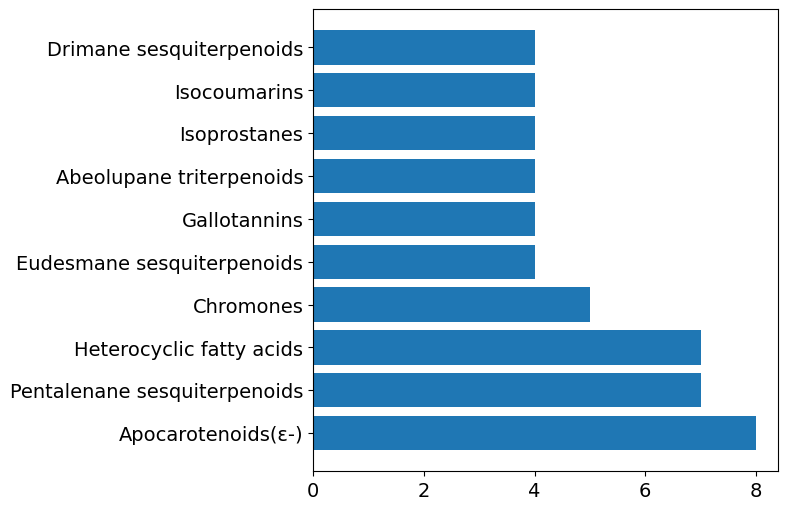

In [107]:
g = df.groupby('original_index').agg({'environmental_subclass':'nunique'})
g = pd.merge(g, node_data['nodes'][['original_index',class_term]].drop_duplicates(), left_index=True, right_on='original_index', how='left')
g = g[pd.notna(g[class_term])]
g = g.groupby(class_term).agg({'environmental_subclass':'median', 'original_index':'nunique'})
g = g[g['original_index'] > 10]
g.sort_values('environmental_subclass', ascending=False, inplace=True)
g = g.head(10)
fig,ax = plt.subplots(figsize=(6,6))
ax.barh(g.index, g['environmental_subclass'])


In [95]:
# get both the node count and the unique environmental subclasses associated with each class_term
# count would be unique count of original_index
# unique would be unique count of environmental_subclass
g = df.groupby(class_term).agg({'original_index':'nunique', 'environmental_subclass':'nunique'})
g = g[g['original_index'] > 10]
g.sort_values('environmental_subclass', ascending=False, inplace=True)

/tmp/ipykernel_2112534/3350858586.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=8)


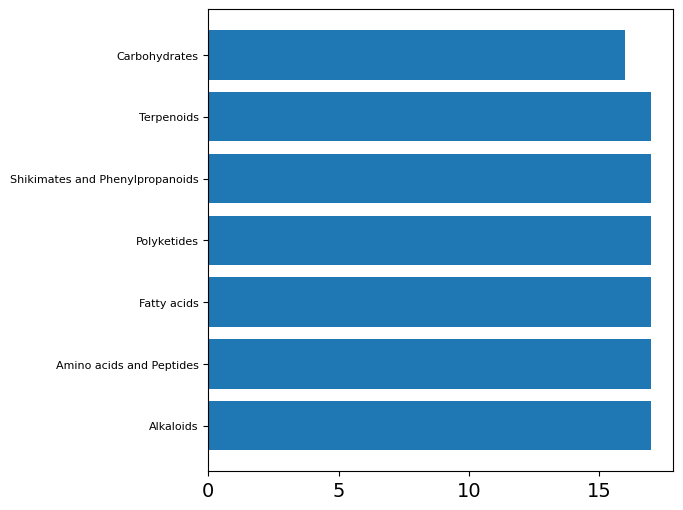

In [97]:
fig,ax = plt.subplots(figsize=(6,6))
ax.barh(g.index, g['environmental_subclass'])
# make y ticks smaller
ax.set_yticklabels(ax.get_yticklabels(), fontsize=8)
plt.show()

In [75]:
g.tail(10)

NPC#class
Cyanogenic glycosides                1
Linear polyenes                      1
Coumaronochromones                   1
Cephamycins                          1
RiPPs                                1
Salinosporamides                     1
Scalarane sesterterpenoids           1
Cassane diterpenoids                 1
Betaestacin-type sesterterpenoids    1
Lactones                             1
Name: environmental_subclass, dtype: int64

In [47]:
top_nodes = analysis_df['original_index'].value_counts().head(200).index.tolist()
top_nodes = node_data['nodes'][node_data['nodes']['original_index'].isin(top_nodes)].copy()
# top_nodes.columns
top_nodes


,original_index,temp_index,rt,count,precursor_mz,sum_frag_intensity,max_frag_intensity,isolated_precursor_mz,filename,basename,...,n,s,p,has_library_match,is_singleton,NPC#pathway,NPC#superclass,NPC#class,color_compound_class,n_to_p
5,2308834,3287,3.779976,12,339.144733,644260.613281,233154.578125,339.181152,/global/cfs/cdirs/metatlas/projects/envnet_bui...,20220707_JGI_SB_503799_Permafrost_pilot_QE-HF_...,...,0.0,0.0,0.0,False,False,Terpenoids,Diterpenoids,Gibberellins,#1f77b4,NaN
41,212750,1554,3.114479,4,173.08183,6450918.529297,5997540.0,173.081787,/global/cfs/cdirs/metatlas/projects/envnet_bui...,20230831_EB_MdR_101544-059_FRCgw2_20230830_EXP...,...,0.0,0.0,0.0,True,False,Fatty acids,Fatty Acids and Conjugates,Dicarboxylic acids,#ff7f0e,NaN
42,358703,4195,10.914714,3,187.097663,190270.456299,180036.328125,187.097946,/global/cfs/cdirs/metatlas/projects/envnet_bui...,20220707_JGI_SB_503799_Permafrost_pilot_QE-HF_...,...,0.0,0.0,0.0,True,False,Fatty acids,Fatty Acids and Conjugates,Dicarboxylic acids,#ff7f0e,NaN
138,827081,9820,7.914924,3,243.159919,1029750.21582,577371.0,243.160095,/global/cfs/cdirs/metatlas/projects/envnet_bui...,MGC2301302_JF_TARA_TREC_SPE_DOM_002_Z00_PPL2_N...,...,0.0,0.0,0.0,True,False,Fatty acids,Fatty Acids and Conjugates,Dicarboxylic acids,#ff7f0e,NaN
139,671269,6940,6.813925,3,229.144046,1770846.509766,908352.0,229.143661,/global/cfs/cdirs/metatlas/projects/envnet_bui...,DOM_Interlab-LC-MS_Lab20_A5M_Neg_MS2_rep3.h5,...,0.0,0.0,0.0,True,False,Fatty acids,Fatty Acids and Conjugates,Dicarboxylic acids,#ff7f0e,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15066,2320628,3762,4.046265,3,339.180623,15605.271973,6347.446777,339.108612,/global/cfs/cdirs/metatlas/projects/envnet_bui...,VIEQ131_neg_1.h5,...,0.0,0.0,0.0,False,False,Amino acids and Peptides,Small peptides,Aminoacids,#d62728,NaN
15425,1657476,10611,9.365952,4,309.172265,13908.645508,4869.664062,309.153503,/global/cfs/cdirs/metatlas/projects/envnet_bui...,S72_neg_2.h5,...,4.0,0.0,0.0,False,False,NaN,NaN,NaN,NaN,NaN
15973,1426324,1505,3.814,3,295.155626,6546.161865,2461.370117,295.119049,/global/cfs/cdirs/metatlas/projects/envnet_bui...,2D_Frac_3b_NEG.h5,...,0.0,0.0,0.0,False,False,NaN,NaN,NaN,NaN,NaN
17715,820415,8635,7.887149,5,243.123039,94834.117188,34617.910156,243.160202,/global/cfs/cdirs/metatlas/projects/envnet_bui...,SIO_1D-DOM_19_NEG.h5,...,0.0,0.0,0.0,False,False,NaN,NaN,NaN,NaN,NaN


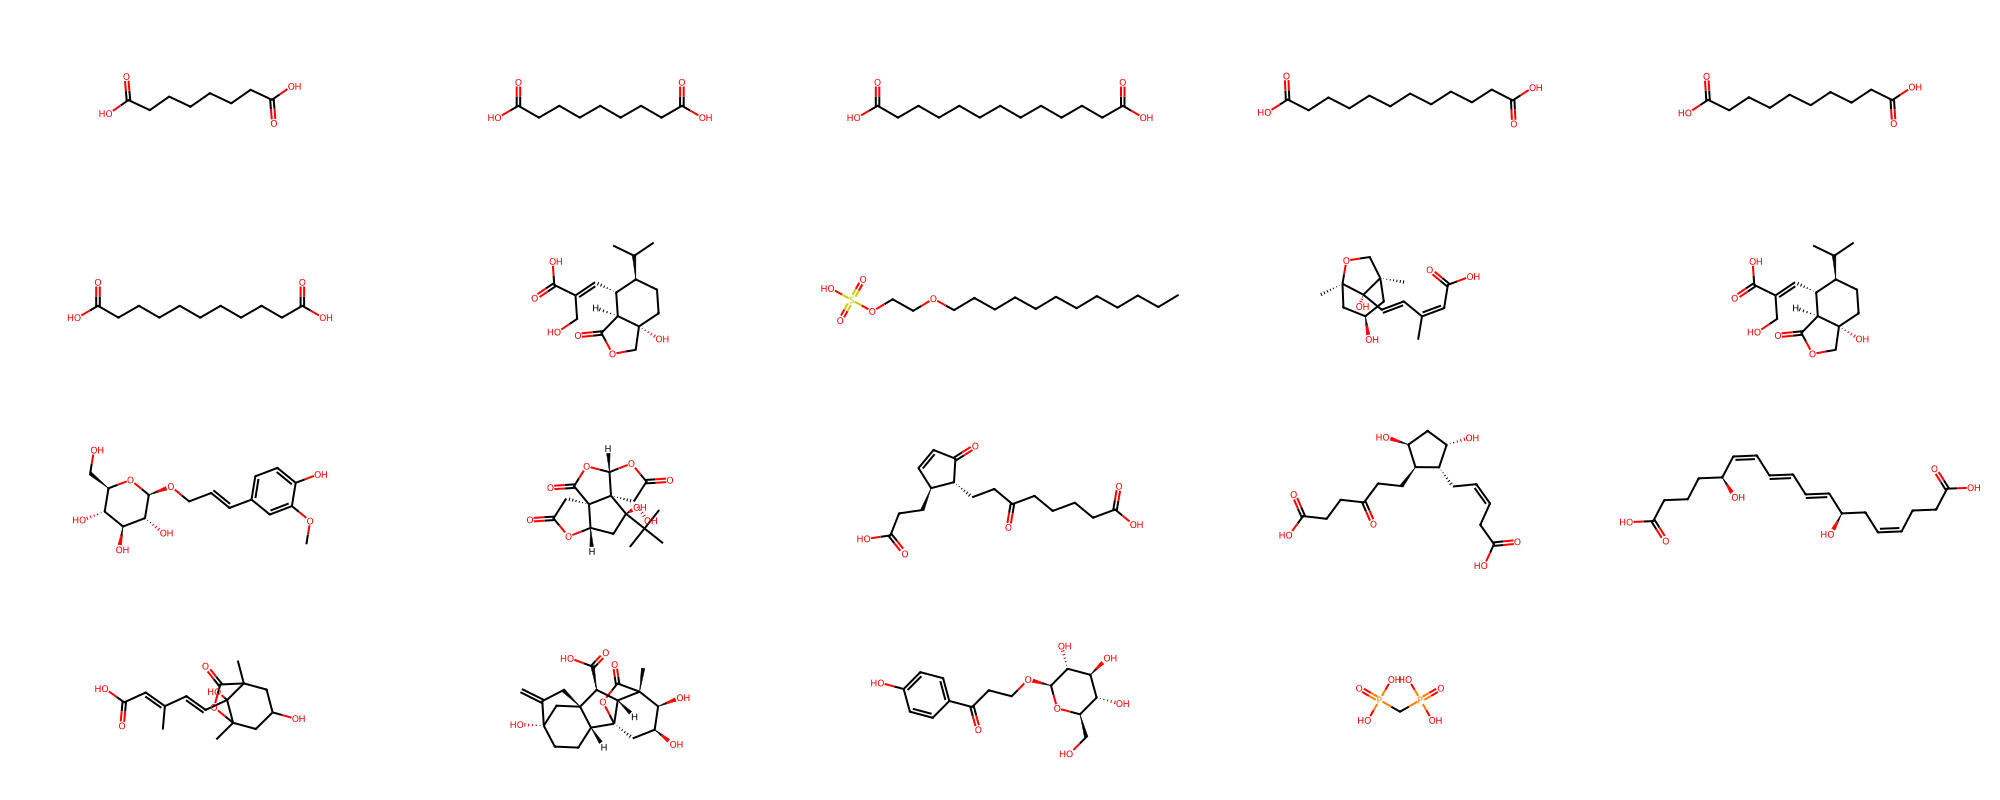

In [50]:
# setup structure drawing with rdkit
smiles = [s for s in top_nodes['smiles'] if s is not np.nan]
from rdkit import Chem
from rdkit.Chem import Draw
mols = [Chem.MolFromSmiles(s) for s in smiles]
img = Draw.MolsToGridImage(mols, molsPerRow=5, subImgSize=(400,200),useSVG=True)
img

In [8]:
# filename  = '/global/u2/b/bpb/repos/envnet/results/full_build_20250908_181404/ms1_results/ms1_annotations.parquet'
# import pyarrow.parquet as pq
# pf = pq.ParquetFile(filename)
# # Get an iterator for the first row group and read it as a batch
# first_rows_batch = next(pf.iter_batches(batch_size=10))
# # Convert the batch to a pandas DataFrame
# df_first_10 = first_rows_batch.to_pandas()
# df_first_10.columns

In [9]:
# filename  = '/global/u2/b/bpb/repos/envnet/results/full_build_20250908_181404/ms2_results/ms2_deconvoluted_annotations.parquet'
# import pyarrow.parquet as pq
# pf = pq.ParquetFile(filename)
# # Get an iterator for the first row group and read it as a batch
# first_rows_batch = next(pf.iter_batches(batch_size=10))
# # Convert the batch to a pandas DataFrame
# df_first_10 = first_rows_batch.to_pandas()
# df_first_10.columns

In [10]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
filename  = '/global/u2/b/bpb/repos/envnet/results/full_build_20250908_181404/ms2_results/ms2_deconvoluted_annotations.parquet'
# read first 10 rows of a parquet file
cols = ['ms2_data_index_deconvoluted_match', 'temp_index','ref_deconvoluted_match','score_deconvoluted_match', 'matches_deconvoluted_match',
       'precursor_mz_query_deconvoluted_match',
       'precursor_mz_ref_deconvoluted_match', 'mz_diff_deconvoluted_match',
       'rt', 'count','precursor_mz', 'filename', 'basename',
       'nearest_precursor', 'mz_diff', 'annotation_method', 'spectrum_type',
       'confidence_level']
df = pd.read_parquet(filename, columns=cols)
df.sort_values('score_deconvoluted_match', ascending=False, inplace=True)
df.drop_duplicates(subset=['filename','ref_deconvoluted_match'], keep='first', inplace=True)

ref_dir="/global/homes/b/bpb/repos/envnet/results/full_build_20250908_181404"
metadata_filename = os.path.join(ref_dir,'input_for_annotation.csv')
metadata_df = pd.read_csv(metadata_filename)
df = pd.merge(df,metadata_df[['h5','environmental_subclass']],left_on='filename', right_on='h5', how='left')

df.head()
# import pyarrow.parquet as pq
# pf = pq.ParquetFile(filename)
# # Get an iterator for the first row group and read it as a batch
# first_rows_batch = next(pf.iter_batches(batch_size=10))
# # Convert the batch to a pandas DataFrame
# df_first_10 = first_rows_batch.to_pandas()
# df_first_10.columns



,ms2_data_index_deconvoluted_match,temp_index,ref_deconvoluted_match,score_deconvoluted_match,matches_deconvoluted_match,precursor_mz_query_deconvoluted_match,precursor_mz_ref_deconvoluted_match,mz_diff_deconvoluted_match,rt,count,precursor_mz,filename,basename,nearest_precursor,mz_diff,annotation_method,spectrum_type,confidence_level,h5,environmental_subclass
0,1510750,17309,20582,5.689445,49.0,182.996951,182.996951,0.000000,12.254275,7,182.996951,/global/cfs/cdirs/metatlas/projects/envnet_bui...,DOM_Interlab-LCMS_Lab19_A45M_Neg_MS2_rep2.h5,182.996951,0.000000,MS2_deconvoluted_spectral_match,deconvoluted,High,/global/cfs/cdirs/metatlas/projects/envnet_bui...,ENVO:00002150
1,4065919,17309,20582,5.689445,49.0,182.996951,182.996951,0.000000,12.254275,7,182.996951,/global/cfs/cdirs/metatlas/projects/envnet_bui...,DOM_Interlab-LCMS_Lab19_A45M_Neg_MS2_rep2.h5,182.996951,0.000000,MS2_deconvoluted_spectral_match,deconvoluted,High,/global/cfs/cdirs/metatlas/projects/envnet_bui...,ENVO:00002150
2,1548347,18955,20582,5.221710,41.0,182.995160,182.996951,0.001791,12.208813,7,182.995160,/global/cfs/cdirs/metatlas/projects/envnet_bui...,DOM_Interlab-LCMS_Lab19_A5M_Neg_MS2_rep2.h5,182.993707,0.001453,MS2_deconvoluted_spectral_match,deconvoluted,High,/global/cfs/cdirs/metatlas/projects/envnet_bui...,ENVO:00002150
3,4103516,18955,20582,5.221710,41.0,182.995160,182.996951,0.001791,12.208813,7,182.995160,/global/cfs/cdirs/metatlas/projects/envnet_bui...,DOM_Interlab-LCMS_Lab19_A5M_Neg_MS2_rep2.h5,182.993707,0.001453,MS2_deconvoluted_spectral_match,deconvoluted,High,/global/cfs/cdirs/metatlas/projects/envnet_bui...,ENVO:00002150
4,4053649,16143,20582,5.062734,41.0,182.994975,182.996951,0.001975,11.536721,7,182.994975,/global/cfs/cdirs/metatlas/projects/envnet_bui...,DOM_Interlab-LCMS_Lab19_A45M_Neg_MS2_rep1.h5,182.993707,0.001268,MS2_deconvoluted_spectral_match,deconvoluted,High,/global/cfs/cdirs/metatlas/projects/envnet_bui...,ENVO:00002150


In [12]:
env_classes = pd.read_csv('/global/homes/b/bpb/repos/envnet/envnet/data/envo_relationships.csv')
env_classes

,name,id,common parent id,common parent name
0,agricultural soil,ENVO:00002259,ENVO:00001998,soil
1,coastal sea water,ENVO:00002150,ENVO:00002149,sea water
2,desert sand,ENVO:00005800,ENVO:00005800,soil
3,forest soil,ENVO:00002261,ENVO:00001998,soil
4,fresh water,ENVO:00002011,ENVO:00002006,fresh water
5,groundwater,ENVO:01001004,ENVO:00002006,fresh water
6,humic lake,ENVO:01001021,ENVO:01001021,fresh water
7,IHSS Reference Standards,Suwannee River Fulvic Acid Standard II,DOM Standard,IHSS Reference Standards
8,IHSS Reference Standards,Suwannee River Fulvic Acid Standard III,DOM Standard,IHSS Reference Standards
9,IHSS Reference Standards,Suwannee River Fulvic Acid Standard III,DOM Standard,IHSS Reference Standards


In [13]:
env_df = df.drop_duplicates(subset=['environmental_subclass','ref_deconvoluted_match'], keep='first')
env_df = pd.merge(env_df, env_classes, left_on='environmental_subclass', right_on='id', how='left')

Text(0, 0.5, 'Number of envnet nodes')

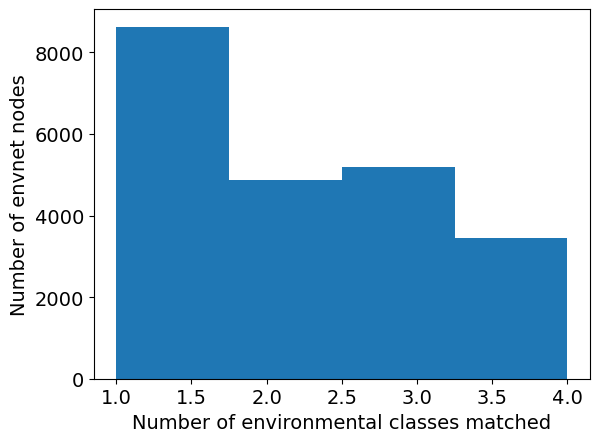

In [14]:
import numpy as np
fig,ax = plt.subplots()
x = env_df.groupby('ref_deconvoluted_match')['common parent name'].nunique()
y,x = np.histogram(x.values,bins=4)
# y = y / df['ref_deconvoluted_match'].nunique()
# ax.set_xlabel('Number of environmental classes matched')
# ax.set_yscale('log')
ax.bar(x[:-1],y,width=np.diff(x), align='edge')
ax.set_xlabel('Number of environmental classes matched')
ax.set_ylabel('Number of envnet nodes')


In [15]:

filename = '/global/homes/b/bpb/repos/envnet/scripts/my_files.csv'
df = pd.read_csv(filename)
# replace all text having 'carbon_network/raw_data' with 'envnet_build_files' in the entire dataframe
for c in df.columns:
    df[c] = df[c].str.replace('carbon_network/raw_data', 'envnet_build_files', regex=False)
df = df[~df['parquet'].str.contains('MSV000081030')]
idx = df['parquet'].str.contains('_deconvoluted.parquet')
df.loc[~idx,'parquet'] = df.loc[~idx,'parquet'].str.replace('.parquet','_deconvoluted.parquet', regex=False)
df['lcmsrun_observed'] = df['h5'].apply(lambda x: x.replace('.h5',''))
df['lcmsrun_observed'] = df['lcmsrun_observed'].str.replace('/global/cfs/cdirs/metatlas/projects/envnet_build_files/','', regex=False)
df['original_file_type'] = 'h5'
output_path = '/global/homes/b/bpb/repos/envnet/results/full_build_20250908_181404'
output_filename = os.path.join(output_path,'input_for_annotation.csv')
df.to_csv(output_filename, index=False)
print(f'Wrote {output_filename} with {len(df)} rows')

Wrote /global/homes/b/bpb/repos/envnet/results/full_build_20250908_181404/input_for_annotation.csv with 1389 rows


In [16]:


# use recursive find to get all parquet files
# use linux find since it is much faster than glob
cmd = "find /global/cfs/cdirs/metatlas/projects/envnet_build_files/ -name '*_deconvoluted.parquet'"
# run command
result = subprocess.run(cmd, shell=True, capture_output=True, text=True)
files = result.stdout.splitlines()
len(files)
files = [f for f in files if "MSV000081030" not in f] # MetaboLights MTBLS144 - GNPS Dissolved organic matter produced by Thalassiosira pseudonana


# filename = '/global/homes/b/bpb/repos/envnet/scripts/my_files.csv'
# df = pd.read_csv(filename)
# # replace all text having 'carbon_network/raw_data' with 'envnet_build_files' in the entire dataframe
# for c in df.columns:
#     df[c] = df[c].str.replace('carbon_network/raw_data', 'envnet_build_files', regex=False)
# df = df[~df['parquet'].str.contains('MSV000081030')]
# idx = df['parquet'].str.contains('_deconvoluted.parquet')
# df.loc[~idx,'parquet'] = df.loc[~idx,'parquet'].str.replace('.parquet','_deconvoluted.parquet', regex=False)

# print(df.shape)
# df.to_csv('/global/homes/b/bpb/repos/envnet/scripts/build_files.csv', index=False)
# for f in df.head()['parquet'].tolist():
#     print(f)
#     print(os.path.exists(f))

NameError: name 'subprocess' is not defined

In [ ]:
# # remove MSV000081030 files.  These seem to be not environmental

print(len(files))
# files = [f for f in files if "MSV000088008" not in f]

# # files = [f for f in files if "DOM_Interlab-LCMS_Lab024" not in f]
# len(files)

In [ ]:
import os
for f in files:
    mzml_filename = f.replace("_deconvoluted.parquet", ".mzML")
    h5_filename = f.replace("_deconvoluted.parquet", ".h5")
    if not os.path.exists(mzml_filename):
        print(f)
    if not os.path.exists(h5_filename):
        print(f)